In [458]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [406]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [407]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [408]:
# show missing value of data
train_data.isna().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [409]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [410]:
name_lst = train_data['Name']

In [411]:
rice_name_lst = [x for x in name_lst if x.split(',')[0] == 'Rice']
rice_name_lst

['Rice, Master. Eugene',
 'Rice, Master. Arthur',
 'Rice, Master. Eric',
 'Rice, Master. George Hugh',
 'Rice, Mrs. William (Margaret Norton)']

In [412]:
train_data.loc[train_data['Name'].isin(rice_name_lst)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q


In [413]:
palsson_name_lst = [x for x in name_lst if x.split(',')[0] == 'Fortune']
palsson_name_lst

['Fortune, Mr. Charles Alexander',
 'Fortune, Miss. Mabel Helen',
 'Fortune, Miss. Alice Elizabeth',
 'Fortune, Mr. Mark']

In [414]:
train_data.loc[train_data['Name'].isin(palsson_name_lst)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [415]:
train_data['FirstName'] = train_data.apply(lambda row: row['Name'].split(',')[0], axis=1)
test_data['FirstName'] = test_data.apply(lambda row: row['Name'].split(',')[0], axis=1)

In [416]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [417]:
# sns.heatmap(train_data.corr(), annot=True)

In [418]:
# train_data.loc[train_data['Fare'] == 71.2833]

In [419]:
# from statistics import *
# import matplotlib.pyplot as plt
# df_survived = train_data.loc[train_data['Survived'] == 1]
# df_not_survived = train_data.loc[train_data['Survived'] == 0]

# plt.scatter(df_survived['Age'], [1,2,3,4,5])
# plt.scatter([mean(bill), 22], [mean(tip), 33])
# plt.show()

In [420]:
# show missing value of data
train_data.isna().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
FirstName      0.000000
dtype: float64

In [421]:
# mean of age passenger
mean_age = train_data['Age'].sum()//(train_data.shape[0]-train_data['Age'].isna().sum())
# mean_age = test_data['Age'].sum()//(test_data.shape[0]-test_data['Age'].isna().sum())
# fill na into df
train_data['Age'].fillna(value=mean_age, inplace=True)
test_data['Age'].fillna(value=mean_age, inplace=True)
train_data['Embarked'].fillna(method='ffill', inplace=True)

In [422]:
# show missing value of data
train_data.isna().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
FirstName      0.000000
dtype: float64

In [423]:
# drop unrelate data
train_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [424]:
train_data.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
FirstName     object
dtype: object

In [425]:
def feature_encode(df, cols, input_type=None):
    if input_type == 'str':
        for col in cols:
            df[col] = df[col].astype(str)
            df[col] = LabelEncoder().fit_transform(df[col])
            df[col] = df[col].astype(float)
        return df
    for col in cols:
        df[col] = df[col].astype(str)
        df[col] = df[col].astype(float)
    return df

# Encoder feature in string
train_data = feature_encode(train_data, ['Sex', 'Embarked', 'FirstName'], 'str')
test_data = feature_encode(test_data, ['Sex', 'Embarked', 'FirstName'], 'str')
train_data.dtypes

Survived       int64
Pclass         int64
Sex          float64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked     float64
FirstName    float64
dtype: object

In [426]:
# Encoder feature interger
train_data = feature_encode(train_data, ['SibSp', 'Pclass', 'Survived', 'Parch'])
test_data = feature_encode(test_data, ['SibSp', 'Pclass', 'Parch'])

In [427]:
# Prepare X and y data for model 
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FirstName
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,73.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,136.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,251.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,198.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,11.0


In [428]:
num_vocal = []
[[num_vocal.append(x) for x in set(X[col])] for col in X.columns]
[[num_vocal.append(x) for x in set(test_data[col])] for col in test_data.columns]
num_vocal = list(set(num_vocal))
len(num_vocal)

layer_normal = tf.keras.layers.Normalization(axis=None, dtype=)
layer_normal.adapt(num_vocal)

def normalization_data(df, layer):
    for col in df.columns:
        df[col] = layer(df[col])
    return df

Z = normalization_data(train_data, layer_normal)
Z.head()

In [429]:
# layer_normal([333.000,444.000]) 

In [430]:
# layer_normal = tf.keras.layers.Normalization(axis=None)
# layer_normal.adapt(num_vocal)

In [431]:
# layer_normal(123)

In [435]:
# Split data
X_train , X_val , y_train , y_val = train_test_split(X, y, random_state = 12 , test_size =0.2)

In [438]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(12, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [439]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
72/72 [==============================] - 1s 980us/step - loss: 0.6510 - accuracy: 0.6419
Epoch 2/100
72/72 [==============================] - 0s 972us/step - loss: 0.6222 - accuracy: 0.6966
Epoch 3/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.6896
Epoch 4/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.7008
Epoch 5/100
72/72 [==============================] - 0s 958us/step - loss: 0.5934 - accuracy: 0.6882
Epoch 6/100
72/72 [==============================] - 0s 930us/step - loss: 0.5883 - accuracy: 0.6980
Epoch 7/100
72/72 [==============================] - 0s 930us/step - loss: 0.5894 - accuracy: 0.6980
Epoch 8/100
72/72 [==============================] - 0s 958us/step - loss: 0.5773 - accuracy: 0.7065
Epoch 9/100
72/72 [==============================] - 0s 944us/step - loss: 0.5745 - accuracy: 0.7177
Epoch 10/100
72/72 [==============================] - 0s 930us/step - loss: 0.5667 - accuracy: 

72/72 [==============================] - 0s 930us/step - loss: 0.4259 - accuracy: 0.8146
Epoch 82/100
72/72 [==============================] - 0s 930us/step - loss: 0.4265 - accuracy: 0.7978
Epoch 83/100
72/72 [==============================] - 0s 930us/step - loss: 0.4260 - accuracy: 0.7935
Epoch 84/100
72/72 [==============================] - 0s 930us/step - loss: 0.4406 - accuracy: 0.8076
Epoch 85/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8090
Epoch 86/100
72/72 [==============================] - 0s 901us/step - loss: 0.4307 - accuracy: 0.8104
Epoch 87/100
72/72 [==============================] - 0s 930us/step - loss: 0.4252 - accuracy: 0.8076
Epoch 88/100
72/72 [==============================] - 0s 944us/step - loss: 0.4206 - accuracy: 0.7992
Epoch 89/100
72/72 [==============================] - 0s 930us/step - loss: 0.4242 - accuracy: 0.7992
Epoch 90/100
72/72 [==============================] - 0s 930us/step - loss: 0.4233 - accuracy: 0.

In [459]:
y_pred = classifier.predict(test_data)
y_pred = np.where(y_pred>0.5, 1, 0)
y_pred

14/14 [==============================] - 0s 921us/step


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

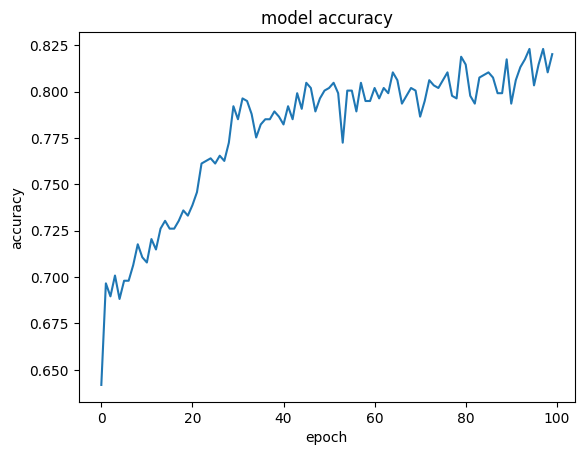

In [456]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [472]:
df_result = pd.DataFrame()
val_data = pd.read_csv('test.csv')
df_result['PassengerId'] = val_data['PassengerId']
df_result['Survived'] = y_pred
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [473]:
df_result.to_csv('submission.csv', index=False)